In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

In [5]:
from xgboost.sklearn import XGBClassifier, XGBRegressor

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


C:\Users\Noh\AppData\Local\Temp\ipykernel_24980\700190609.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True).sort_index()


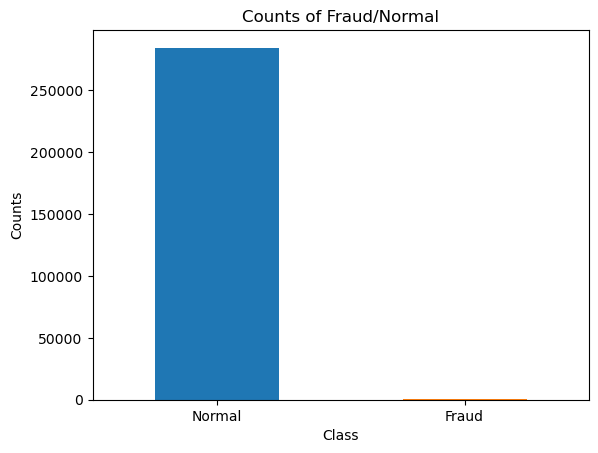

In [6]:
X = df.iloc[:, 1:-1].values
y = df['Class'].values

count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', color = ['C0', 'C1'])

plt.title("Counts of Fraud/Normal")
plt.xticks(range(2), ['Normal', 'Fraud'], rotation=0)
plt.xlabel("Class")
plt.ylabel("Counts")
plt.show()

In [7]:
scale_pos_weight = y.shape[0] / y.sum() - 1
print('Counts of Normal transactions / Counts of Fraudulent transactions: {}'.format(scale_pos_weight))

Counts of Normal transactions / Counts of Fraudulent transactions: 577.8760162601626


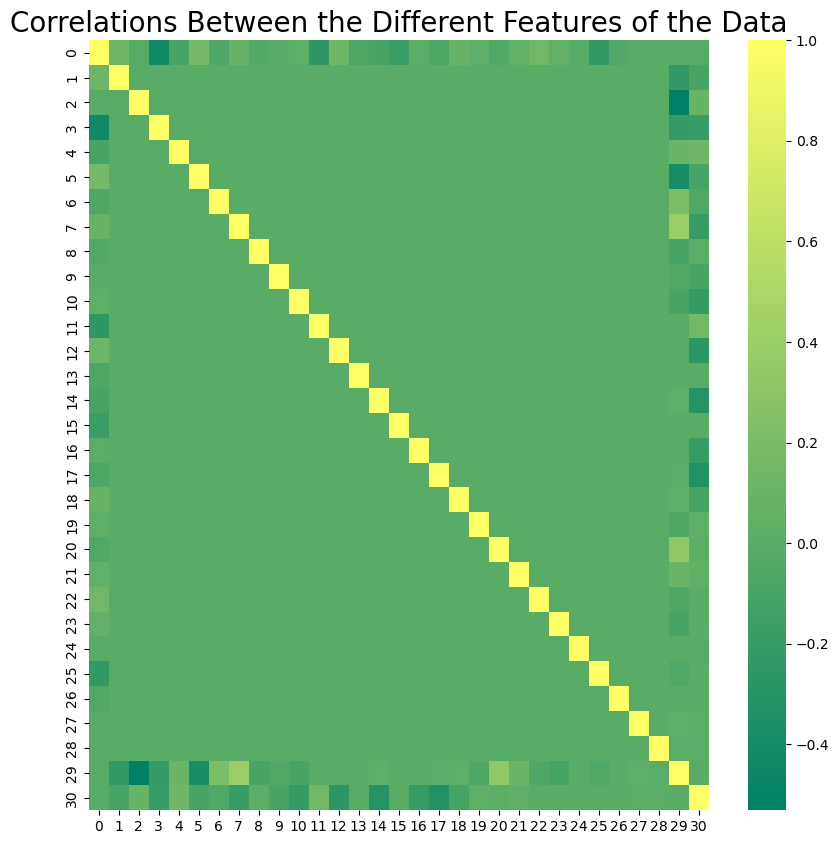

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 10))
cm = np.corrcoef(df.values.T)
hm = sns.heatmap(cm, cmap = 'summer')
plt.title('Correlations Between the Different Features of the Data', fontsize = 20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

<Axes: >

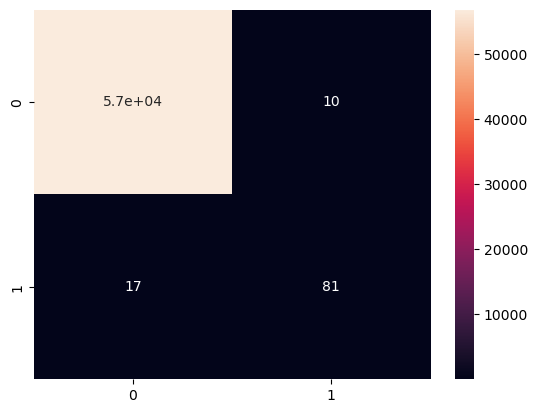

In [10]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_mat, annot = True)